In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Deep Learning\Session-3\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [16]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


In [17]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [25]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential()

model.add(Dense(11, activation = 'sigmoid', input_dim = 11))
model.add(Dense(11, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
history = model.fit(X_train_scaled, y_train, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7995 - loss: 0.5102 - val_accuracy: 0.7969 - val_loss: 0.4876
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7914 - loss: 0.4883 - val_accuracy: 0.7969 - val_loss: 0.4655
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.4623 - val_accuracy: 0.7969 - val_loss: 0.4462
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7848 - loss: 0.4540 - val_accuracy: 0.7962 - val_loss: 0.4371
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7968 - loss: 0.4333 - val_accuracy: 0.8087 - val_loss: 0.4335
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.4260 - val_accuracy: 0.8081 - val_loss: 0.4321
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4261 - val_accuracy: 0.8087 - val_loss: 0.4317
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8122 - loss: 0.4209 - val_accuracy: 0.

In [34]:
model.layers[0].get_weights()

[array([[-0.06437631, -0.2035375 , -0.30748317,  0.12182774,  0.2969542 ,
          0.1623216 , -0.15351692, -0.02287018,  0.07888655, -0.18675342,
          0.28849494],
        [ 1.6894457 ,  1.3866918 ,  0.57019776, -1.1035333 , -1.3260435 ,
         -0.3055173 ,  1.6033857 , -0.01649554, -0.63649434, -1.1076698 ,
          0.81860006],
        [ 0.1415226 , -0.23388389, -0.24119093,  0.2586539 ,  0.27405906,
          0.26519674,  0.3174016 ,  0.12621474, -0.19369121, -0.36731097,
         -0.2897954 ],
        [ 0.4108315 ,  0.3498739 ,  0.20602703,  0.0819742 , -0.28106523,
         -0.3151277 , -0.092062  , -0.18322636,  0.06714758,  0.01959121,
          0.28727764],
        [-0.01712733,  0.14983705,  0.2072955 ,  0.4869942 , -0.00583708,
          0.12719934, -0.20764752,  0.3767547 ,  1.0986608 , -0.06276442,
          0.20939054],
        [-0.23341559,  0.12032258, -0.25635844, -0.02848033, -0.11108032,
          0.40120223, -0.10011925, -0.29893118, -0.09142725, -0.1082669

In [35]:
model.layers[1].get_weights()

[array([[-7.7761725e-02, -3.0743846e-01, -5.9477168e-01,  1.8830432e-01,
         -9.9371321e-02, -8.5625583e-01, -8.5096635e-02, -1.9769324e-01,
         -7.0223525e-02,  2.3529997e-02,  7.1432549e-01],
        [-6.5267497e-01, -1.3813274e-01, -3.9977413e-01,  3.4587571e-01,
          6.2017602e-01, -5.3529567e-01, -4.1907719e-01, -2.9916763e-01,
         -6.6392249e-01, -6.5574664e-01,  3.3687603e-01],
        [-6.4116549e-01, -3.7728515e-01, -4.4520360e-01,  5.4723698e-01,
          4.1671818e-01,  2.5558603e-01, -5.6427759e-01, -7.0207262e-01,
         -3.1007588e-01, -7.3184264e-01,  1.5630294e-01],
        [ 7.9586399e-01,  4.0872598e-01,  8.0891871e-01, -2.3034549e-01,
          1.0069030e-01,  4.1725717e-02,  5.6358230e-01,  4.4312615e-02,
          5.3933132e-01,  5.3252083e-01, -4.8988175e-02],
        [ 7.6551646e-01,  7.9527724e-01,  4.8922828e-01, -6.3303268e-01,
         -6.2054771e-01,  7.3268032e-01,  3.3736408e-01,  2.7478671e-01,
          2.6344457e-01, -9.5759027e-0

In [36]:
model.layers[2].get_weights()

[array([[-0.52868146],
        [-0.3399512 ],
        [-0.78570145],
        [ 0.2473632 ],
        [ 0.41829658],
        [-0.79530895],
        [-0.11685634],
        [-0.5781107 ],
        [-0.5479154 ],
        [-0.43984577],
        [ 0.503569  ]], dtype=float32),
 array([-0.01074947], dtype=float32)]

In [37]:
ylog = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [38]:
y_pred = np.where(ylog > 0.5, 1, 0)

In [39]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8145

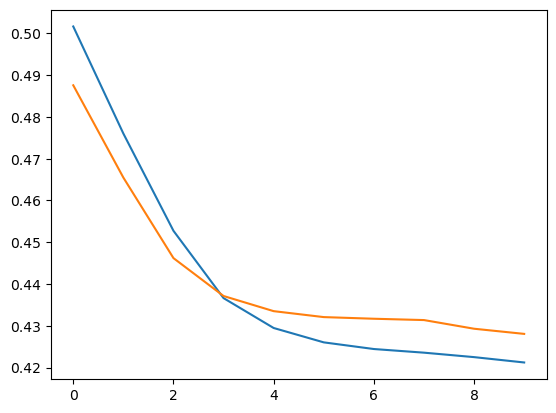

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

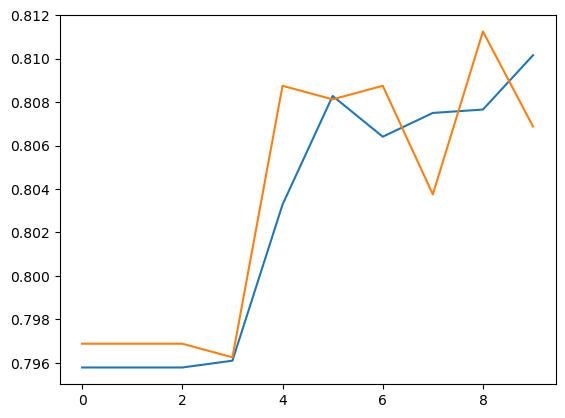

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()